# Logit

$$Y_{i}^{*}=X_{i}\theta+e_{i}$$

$$Y_{i}=\begin{cases}
1, & Y_{i}^{*}>0,\\
0, & Y_{i}^{*}\leq0.
\end{cases}$$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
sns.set_context('notebook')

%matplotlib inline

## Generate data

In [2]:
# True parameter
theta = 1.5
# Sample size
n = int(1e2)
# Independent variable, N(0,1)
X = np.random.normal(0, 1, n)
# Error term, N(0,1)
e = np.random.logistic(0, 1, n)

# Sort data for nice plots
X = np.sort(X)

# Unobservable dependent variable
Ys = X * theta + e

# Generate observable binary variable
Y = np.zeros_like(Ys)
Y[Ys > 0] = 1

## Plot the data and the model

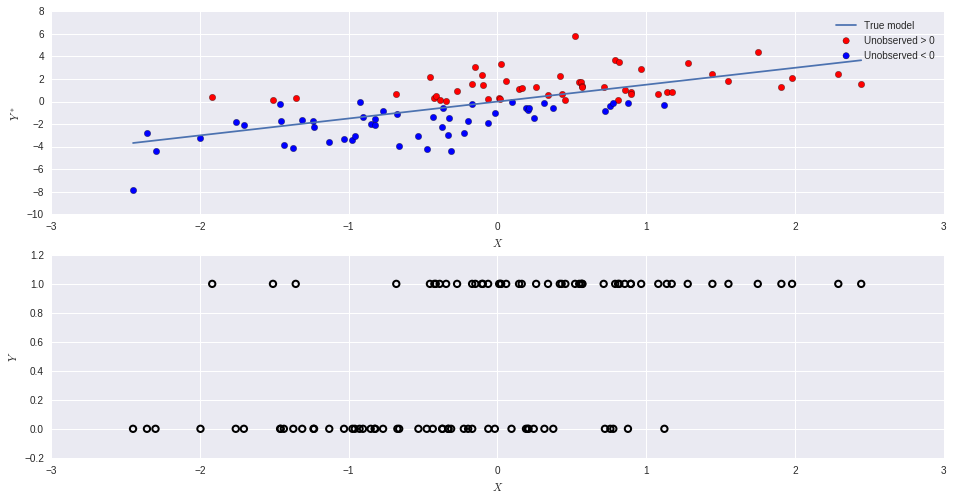

In [3]:
plt.figure(figsize=(16, 8))

# Unobservables
plt.subplot(2, 1, 1)
plt.plot(X, X * theta, label='True model')
plt.scatter(X[Ys > 0], Ys[Ys > 0], c='red', label='Unobserved > 0', s=40)
plt.scatter(X[Ys < 0], Ys[Ys < 0], c='blue', label='Unobserved < 0', s=40)
plt.ylabel(r'$Y^*$')
plt.xlabel(r'$X$')
plt.legend()

# Observables
plt.subplot(2, 1, 2)
plt.scatter(X, Y, c=[], s=40, lw=2)
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')

plt.show()

## Maximize log-likelihood

$$l\left(y|x,\theta\right)=\sum_{i=1}^{n}\log f\left(y_{i}|x_{i},\theta\right)=\sum_{i=1}^{n}\left[y_{i}\log\Lambda\left(x_{i}\theta\right)+\left(1-y_{i}\right)\log\left[1-\Lambda\left(x_{i}\theta\right)\right]\right]$$

In [4]:
import scipy.optimize as opt
from scipy.stats import logistic

# Define objective function
def f(theta, X, Y):
    Q = - np.sum(Y * np.log(1e-3 + logistic.cdf(X * theta)) + (1 - Y) * np.log(1e-3 + 1 - logistic.cdf(X * theta)))
    return Q

# Run optimization routine
theta_hat = opt.fmin_bfgs(f, 0., args=(X, Y))

print(theta_hat)

Optimization terminated successfully.
         Current function value: 53.944873
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
[ 1.3861]


## Plot objective function, true parameter, and the estimate

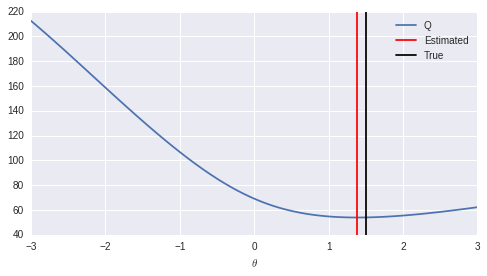

In [5]:
# Generate data for objective function plot
th = np.linspace(-3., 3., 1e2)
Q = [f(z, X, Y) for z in th]

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(th, Q, label='Q')
plt.xlabel(r'$\theta$')
plt.axvline(x=theta_hat, c='red', label='Estimated')
plt.axvline(x=theta, c='black', label='True')
plt.legend()
plt.show()

## Solve first order conditions

In [6]:
from scipy.optimize import fsolve

# Define the first order condition
def df(theta, X, Y):
    return - np.sum(logistic.pdf(X * theta) * (Y - logistic.cdf(X * theta)))

# Solve FOC
theta_hat = fsolve(df, 0., args=(X, Y))

print(theta_hat)

[ 0.]


## Plot first order condition

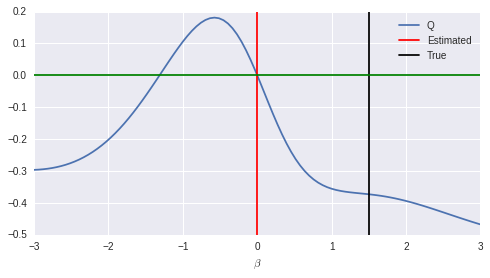

In [7]:
# Generate data for the plot
th = np.linspace(-3., 3., 1e2)
Q = np.array([df(z, X, Y) for z in th])

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(th, Q, label='Q')
plt.xlabel(r'$\beta$')
plt.axvline(x=theta_hat, c='red', label='Estimated')
plt.axvline(x=theta, c='black', label='True')
plt.axhline(y=0, c='green')
plt.legend()
plt.show()

## Plot original data and fitted model

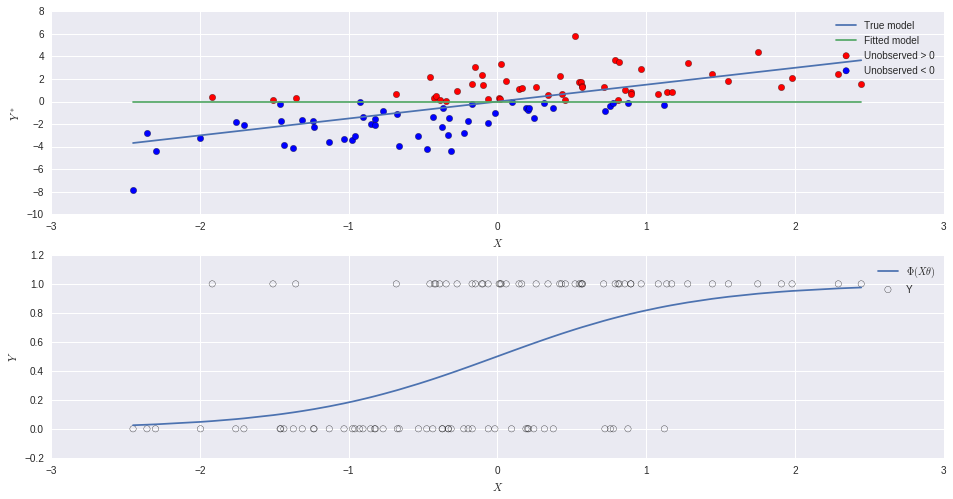

In [8]:
plt.figure(figsize=(16, 8))

# Unobservables
plt.subplot(2, 1, 1)
plt.plot(X, X * theta, label='True model')
plt.plot(X, X * theta_hat, label='Fitted model')
plt.scatter(X[Ys > 0], Ys[Ys > 0], c='red', label='Unobserved > 0', s=40)
plt.scatter(X[Ys < 0], Ys[Ys < 0], c='blue', label='Unobserved < 0', s=40)
plt.ylabel(r'$Y^*$')
plt.xlabel(r'$X$')
plt.legend()

# Observables
plt.subplot(2, 1, 2)
plt.scatter(X, Y, c=[], label='Y', s=40)
plt.plot(X, logistic.cdf(X * theta), label=r'$\Phi(X\theta)$')
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')
plt.legend()

plt.show()